In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import patches
from tqdm import tqdm
%matplotlib inline

train_path = '../train/train.csv'
test_path = '../test/test.csv'
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
train_df.head()

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,1,8.0,0.18,0.37,1.3,0.040,15.0,96.0,0.99120,3.06,0.61,12.1,white,6
1,2,7.5,0.38,0.29,4.9,0.021,38.0,113.0,0.99026,3.08,0.48,13.0,white,7
2,3,6.1,0.27,0.33,2.2,0.021,26.0,117.0,0.98860,3.12,0.30,12.5,white,6
3,4,6.4,0.32,0.50,10.7,0.047,57.0,206.0,0.99680,3.08,0.60,9.4,white,5
4,5,8.4,0.37,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.2,red,7


In [3]:
word_to_num = {"white":0, "red":1}

train_df['type'] = train_df['type'].replace(word_to_num)
train_df

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,1,8.0,0.18,0.37,1.30,0.040,15.0,96.0,0.99120,3.06,0.61,12.1,0,6
1,2,7.5,0.38,0.29,4.90,0.021,38.0,113.0,0.99026,3.08,0.48,13.0,0,7
2,3,6.1,0.27,0.33,2.20,0.021,26.0,117.0,0.98860,3.12,0.30,12.5,0,6
3,4,6.4,0.32,0.50,10.70,0.047,57.0,206.0,0.99680,3.08,0.60,9.4,0,5
4,5,8.4,0.37,0.43,2.30,0.063,12.0,19.0,0.99550,3.17,0.81,11.2,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3226,3227,6.4,0.16,0.31,5.30,0.043,42.0,157.0,0.99455,3.35,0.47,10.5,0,5
3227,3228,6.4,0.18,0.28,17.05,0.047,53.0,139.0,0.99724,3.25,0.35,10.5,0,6
3228,3229,6.0,0.28,0.25,1.80,0.042,8.0,108.0,0.99290,3.08,0.55,9.0,0,5
3229,3230,7.7,0.28,0.29,6.90,0.041,29.0,163.0,0.99520,3.44,0.60,10.5,0,6


In [5]:
X = train_df.drop(['id', 'quality'], axis=1)
y = train_df['quality']

In [6]:
from sklearn.linear_model import LogisticRegression

# 모델 선언
model = LogisticRegression(solver='liblinear')

# 모델 학습
model.fit(X, y)

LogisticRegression(solver='liblinear')

In [7]:
import numpy as np

def ACCURACY(true, pred):   
    score = np.mean(true==pred)
    return score

In [8]:
prediction = model.predict(X)

score = ACCURACY(y, prediction)

print(f"모델의 정확도는 {score*100:.2f}% 입니다")

모델의 정확도는 54.22% 입니다


In [9]:
from collections import Counter

pred_cnt = Counter(prediction)
true_cnt = Counter(y)

for key in sorted(true_cnt.keys()):
    print(f"{key} 값 예측 개수: {pred_cnt[key]}개, 실제 값 개수: {true_cnt[key]}개")

4 값 예측 개수: 0개, 실제 값 개수: 108개
5 값 예측 개수: 1091개, 실제 값 개수: 1069개
6 값 예측 개수: 2049개, 실제 값 개수: 1418개
7 값 예측 개수: 91개, 실제 값 개수: 539개
8 값 예측 개수: 0개, 실제 값 개수: 97개


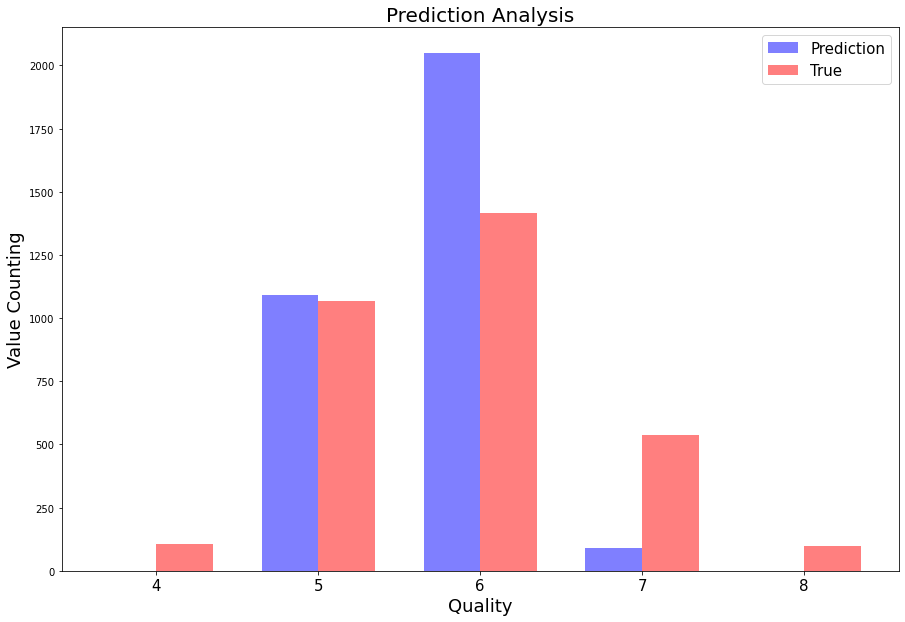

In [10]:
import matplotlib.pyplot as plt

index = sorted(true_cnt.keys())
pred_val = [pred_cnt[key] for key in index]
true_val = [true_cnt[key] for key in index]

plt.figure(figsize=(15,10))
bar_width = 0.35
p1 = plt.bar([idx-bar_width/2 for idx in index], pred_val, 
             bar_width, 
             color='b', 
             alpha=0.5)
p2 = plt.bar([idx+bar_width/2 for idx in index], true_val, 
             bar_width, 
             color='r', 
             alpha=0.5)
plt.title('Prediction Analysis', fontsize=20)
plt.ylabel('Value Counting', fontsize=18)
plt.xlabel('Quality', fontsize=18)
plt.xticks(index, fontsize=15)
plt.legend((p1[0], p2[0]), ('Prediction', 'True'), fontsize=15)
plt.show()

In [11]:
accurate = y[y==prediction]
print("정답을 맞춘 개수 : ", len(accurate))

accu_cnt = Counter(accurate)
true_cnt = Counter(y)

for key in sorted(true_cnt.keys()):
    print(f"{key} 값 예측 개수: {accu_cnt[key]}개, 실제 값 개수: {true_cnt[key]}개, 정답률: {accu_cnt[key]/true_cnt[key]*100:.2f}%")

정답을 맞춘 개수 :  1752
4 값 예측 개수: 0개, 실제 값 개수: 108개, 정답률: 0.00%
5 값 예측 개수: 643개, 실제 값 개수: 1069개, 정답률: 60.15%
6 값 예측 개수: 1057개, 실제 값 개수: 1418개, 정답률: 74.54%
7 값 예측 개수: 52개, 실제 값 개수: 539개, 정답률: 9.65%
8 값 예측 개수: 0개, 실제 값 개수: 97개, 정답률: 0.00%


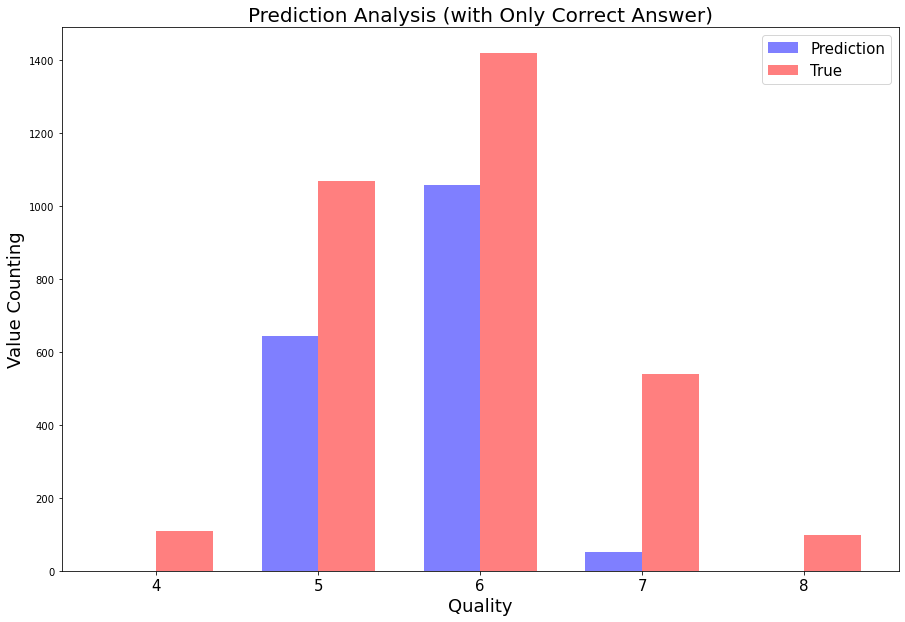

In [12]:
index = sorted(true_cnt.keys())
accu_val = [accu_cnt[key] for key in index]
true_val = [true_cnt[key] for key in index]

plt.figure(figsize=(15,10))
bar_width = 0.35
p1 = plt.bar([idx-bar_width/2 for idx in index], accu_val, 
             bar_width, 
             color='b', 
             alpha=0.5)
p2 = plt.bar([idx+bar_width/2 for idx in index], true_val, 
             bar_width, 
             color='r', 
             alpha=0.5)
plt.title('Prediction Analysis (with Only Correct Answer)', fontsize=20)
plt.ylabel('Value Counting', fontsize=18)
plt.xlabel('Quality', fontsize=18)
plt.xticks(index, fontsize=15)
plt.legend((p1[0], p2[0]), ('Prediction', 'True'), fontsize=15)
plt.show()